In [14]:
import bamt.preprocessors
import bamt.networks as Nets
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer
from itertools import product
from pgmpy.estimators import  K2Score
import numpy as np

from auxiliary import *

imagespath = 'C:/Users/Acer/PycharmProjects/BAMTclone/BAMT/experiments2/images'

- CRIM: per capita crime rate by town.
- ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS: proportion of nonretail business acres per town.
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- NOX: nitric oxides concentration (parts per 10 million).
- RM: average number of rooms per dwelling.
- AGE: proportion of owner-occupied units built prior to 1940.
- DIS: weighted distances to five Boston employment centers.
- RAD: index of accessibility to radial highways.
- TAX: full-value property-tax rate per  10,000 dollars.
- PTRATIO: pupil-teacher ratio by town.
- B: 1000(Bk – 0.63)^2 where Bk is the proportion of blacks by town.
- LSTAT: % lower status of the population.
- MEDV: Median value of owner-occupied homes in 1000s of dollars.

In [2]:
data = pd.DataFrame(np.loadtxt("housing.data.txt"), columns=['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv'])
data.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [3]:
cols = ['crim', 'dis', 'ptratio', 'lstat', 'nox', 'medv']

In [4]:
np.random.seed(SEED)
random.seed(SEED)

qresult = construct_by_quantiles(data[cols], None)
bn = qresult['bn']

c=bn.plot2(imagespath , "bn14.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


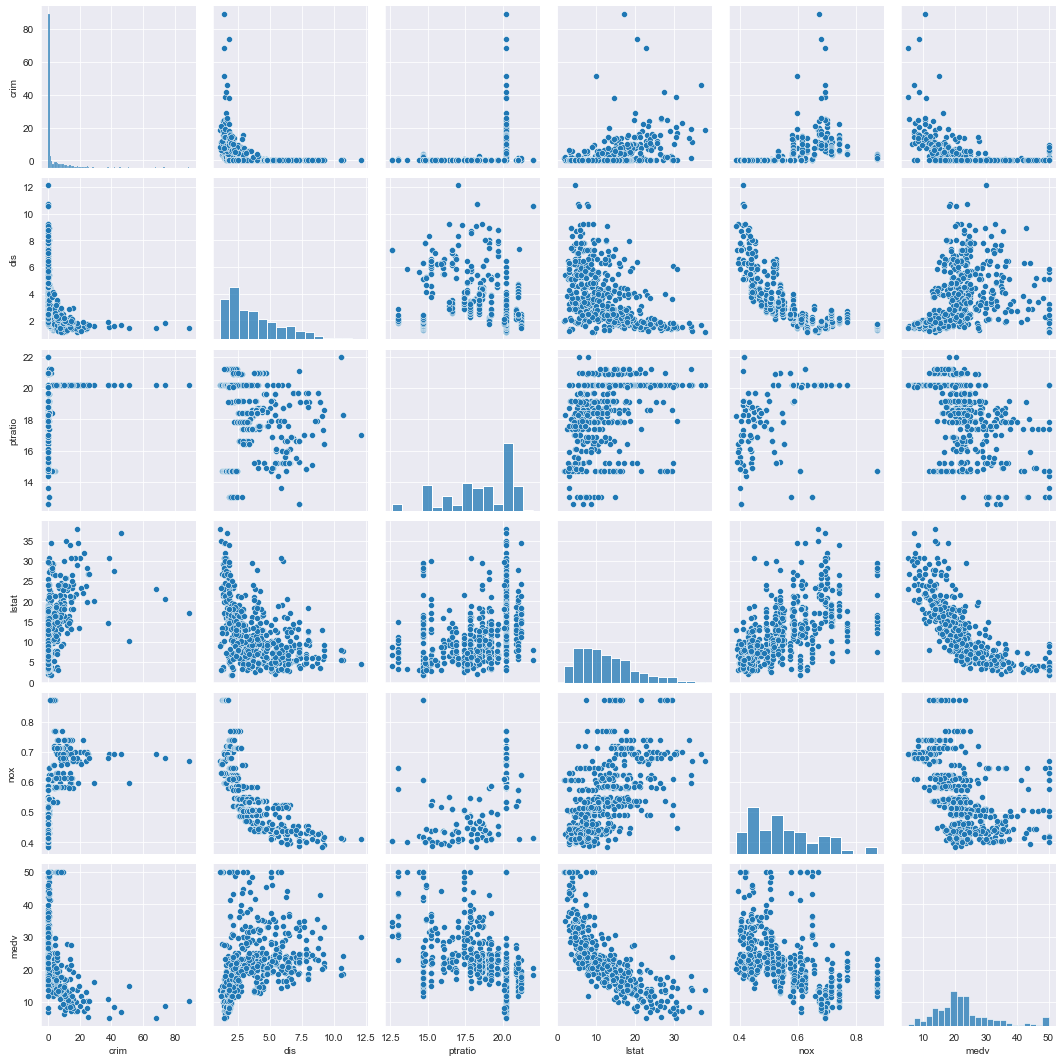

In [5]:
import seaborn as sns
sns.pairplot(data[['crim', 'dis', 'ptratio', 'lstat', 'nox', 'medv']])

![](images/bn14.png)

In [10]:
c=bn.plot_for_specific_nodes(['medv0', 'medv1', 'medv2'], imagespath , "subbn14.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


## Равномерное разбиение

In [5]:
np.random.seed(SEED)
random.seed(SEED)

uresult = construct_by_uniform(data[cols], None)
ubn = uresult['bn']

c=ubn.plot2(imagespath , "ubn14.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


![](images/ubn14.png)

In [11]:
c=ubn.plot_for_specific_nodes(['medv0', 'medv1', 'medv2'], imagespath , "sububn14.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


## KMeansDiscretizer с тремя bin'ами

In [6]:
np.random.seed(SEED)
random.seed(SEED)

kresult = construct_by_kmeans(data[cols], [])
kbn = kresult['bn']

c=kbn.plot2(imagespath , "kbn14.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


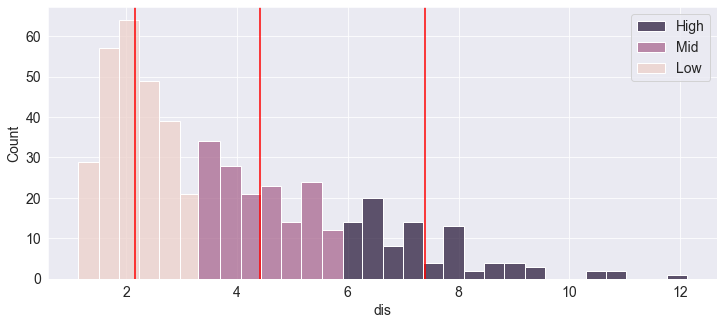

In [26]:
print_histogram('dis')

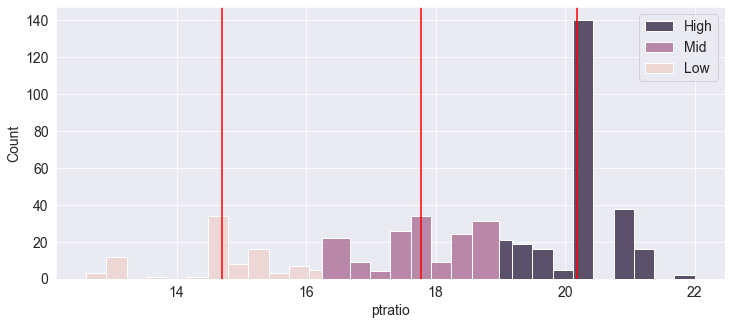

In [27]:
print_histogram('ptratio')

![](images/kbn14.png)

In [12]:
c=kbn.plot_for_specific_nodes(['medv0', 'medv1', 'medv2'], imagespath , "subkbn14.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [7]:
kencoder, data_kdiscretized_enc = kresult['encoder'], kresult['disc_data']

In [8]:
all_edges = list(set(["-".join(e) for e in bn.edges + ubn.edges + kbn.edges])) #white list for the next bn

In [9]:
tradeoffbn = Nets.DiscreteBN()
nodes = list(dict.fromkeys(sum([x.split("-") for x in all_edges], start=[])))
tradeoffbn.add_nodes(dict(types={cat: 'disc' for _, cat in enumerate(nodes)}))

params = {'white_list': [(x[0], x[1]) for x in [y.split("-") for y in all_edges]]}

tradeoffbn.add_edges(data_kdiscretized_enc.astype("int32"), scoring_function=("K2",K2Score), params=params)

c=tradeoffbn.plot2(imagespath, "tbn14.html")

  0%|          | 0/1000000 [00:00<?, ?it/s]

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


![](images/tbn14.png)

In [13]:
c=tradeoffbn.plot_for_specific_nodes(['medv0', 'medv1', 'medv2'], imagespath , "subtbn14.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 
